In [ ]:
 #@title Librerias
import numpy as np
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [ ]:
def regula_falsi(f, a, b, tol=1e-6, max_iter=100):
  '''
  Aplica el método de Regula Falsi para encontrar una raíz de f(x) = 0 en el intervalo [a, b]

  Parámetros:
  f: función a evaluar
  a, b: extremos del intervalo
  tol: tolerancia para la raíz (criterio de parada)
  max_iter: número máximo de iteraciones

  Retorna:
  c: raíz aproximada
  c_anterior: lista con las aproximaciones sucesivas
  i + 1: número de iteraciones realizadas
  '''
  c_anterior = [] #lista para almacenar las aproximaciones de la raíz
  if f(a) * f(b) >= 0: #verificamos que f(a) y f(b) tengan signos opuestos
   raise ValueError("El intervalo no es válido") #si no hay cambio de signo, no se garantiza una raíz
  else:
    for i in range(max_iter):
      #Fórmula de Regula Falsi para calcular la nueva aproximación
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        #guardamos los valores de c en la lista
        c_anterior.append(c)
        #verificamos si f(c) es suficientemente cercano a cero
        if abs(f(c)) < tol:
            return c, c_anterior, i + 1

        #si f(c) tiene el mismo signo que f(a), actualiza el extremo a
        elif f(c) * f(a) > 0:
            a = c
        #si no se cumple, actualiza el extremo b
        else:
            b = c
    #lanza un error si se alcanza el máximo número de iteraciones sin converger
    raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')

In [ ]:
#probamos el método
f = lambda x: x**2 - 4
raiz, valores, iteraciones = regula_falsi(f, 0, 3, tol = 1e-18)
print(f' La raiz es {raiz}')
print(f' El número de iteraciones es {iteraciones}')

 La raiz es 2.0
 El número de iteraciones es 24


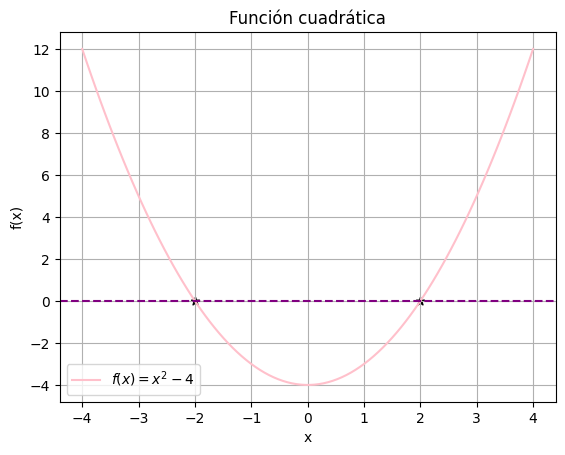

In [ ]:
#gráficamos
x = np.linspace(-4, 4, 100)
plt.plot(x, f(x), label = '$f(x) = x^2 - 4$', color = 'pink')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color = 'purple', linestyle='--')
plt.legend()
plt.grid(True)
plt.scatter([-2, 2], [0, 0], color='black', label='Raíces', marker='*')
plt.title('Función cuadrática')
plt.show()

# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

In [ ]:
# para el item a: definimos la función para la fuerza electrica
q = 2*10**-5
Q = 2*10**-5
e0 = 8.85e-12

def fuerza_electrica(a, x):
  return ((1)/(4*np.pi*e0))*((q*Q*x)/((x**2+a**2)**(3/2)))

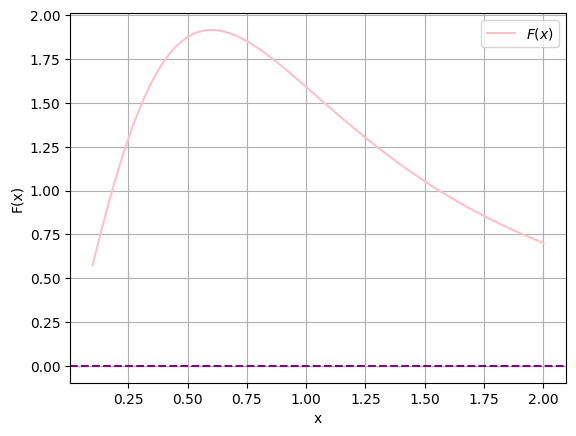

In [ ]:
#para el item b: graficamos la función
x1 = np.linspace(0.1, 2.0, 100)
plt.plot(x1, fuerza_electrica(0.85, x1), label = '$F(x)$', color = 'pink')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.axhline(0, color = 'purple', linestyle='--')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#para el item c: definimos el método de newton raphson (tomado de las notas de clase)

def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    """
    Implementación del método de Newton-Raphson.

    Parámetros:
    f        : función cuya raíz se desea encontrar.
    df       : derivada de la función.
    x0       : valor inicial de la aproximación.
    tol      : tolerancia para la convergencia.
    max_iter : número máximo de iteraciones permitidas.

    Retorna:
    tuple
        (raíz encontrada, lista con las aproximaciones sucesivas).

    Lanza:
    ValueError : Si la derivada es cero en algún punto.
    """
    aproximaciones = []  # Lista para almacenar las aproximaciones sucesivas

    for _ in range(max_iter):
        f_x0 = f(x0)
        df_x0 = df(x0)

        # Asegurarse de que df(x0) no sea cero
        if df_x0 == 0:
            raise ValueError("La derivada es cero, el método no puede continuar.")

        # Fórmula de Newton-Raphson
        x1 = x0 - f_x0 / df_x0
        aproximaciones.append(x1)  # Guardar la aproximación en la lista

        # Verificar la condición de convergencia
        if abs(x1 - x0) < tol:
            return x1, aproximaciones  # Retorna la raíz encontrada y la lista de aproximaciones

        # Actualizar el valor para la siguiente iteración
        x0 = x1

    raise RuntimeError("El método no convergió en el número máximo de iteraciones.")

In [ ]:
#necesitamos definir una funcion tal que f(x) = fuerza_electrica - 1.25
#calculamos la derivada de f(x) a mano

def derivada_fuerza(a, x):
    numerador = q * Q * (a**2 - 2*x**2)
    denominador = (x**2 + a**2)**(5/2)
    return (1 / (4 * np.pi * e0)) * numerador / denominador

#definimos la función f(x) = fuerza_electrica - 1.25
def funcion2(a, x):
    return fuerza_electrica(a, x) - 1.25

#derivada de la función
def derivada_funcion2(a, x):
    return derivada_fuerza(a, x)

#ejecutamos el método de newton raphson
x0 = 1.0  # valor inicial
a = 0.85
x_sol, Aproximaciones = newton_raphson( f=lambda x: fuerza_electrica(a, x) - 1.25,df=lambda x: derivada_fuerza(a, x), x0=1.0)


print(f"\nEl valor de x donde la fuerza es 1.25 N es: {x_sol:.6f} m")
print(f"Aproximaciones: {Aproximaciones}")



El valor de x donde la fuerza es 1.25 N es: 1.297932 m
Aproximaciones: [1.288984513948535, 1.2979034278236121, 1.2979324023810552, 1.297932402689352]


In [ ]:
#ahora realizando lo mismo pero con el metodo de la secante
#definimos el método de la secante (tomado de las notas de clase)

def metodo_secante(f, x0, x1, tol=1e-6, max_iter=100):
    """
    Implementación del método de la secante.

    Parámetros:
    f        : función cuya raíz se desea encontrar.
    x0       : primer valor inicial de la aproximación.
    x1       : segundo valor inicial de la aproximación.
    tol      : tolerancia para la convergencia.
    max_iter : número máximo de iteraciones permitidas.

    Retorna:
    tuple
        (raíz encontrada, lista con las aproximaciones sucesivas).

    Lanza:
    ValueError : Si la diferencia f(x1) - f(x0) es cero.
    """
    aproximaciones = [x0, x1]  # Lista para almacenar las aproximaciones sucesivas

    for _ in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)

        # Asegurarse de que f(x1) - f(x0) no sea cero
        if f_x1 - f_x0 == 0:
            raise ValueError("f(x1) - f(x0) es cero, el método no puede continuar.")

        # Fórmula de la secante
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        aproximaciones.append(x2)  # Guardar la aproximación en la lista

        # Verificar la condición de convergencia
        if abs(x2 - x1) < tol:
            return x2, aproximaciones  # Retorna la raíz encontrada y la lista de aproximaciones

        # Actualizar los valores para la siguiente iteración
        x0 = x1
        x1 = x2

    raise RuntimeError("El método no convergió en el número máximo de iteraciones.")

In [ ]:
#valores iniciales
x0_sec = 0.5
x1_sec = 1.5
a = 0.85  # radio del anillo

#ejecutamos el método
x_secante, aprox_secante = metodo_secante(f=lambda x: fuerza_electrica(a, x) - 1.25, x0=x0_sec, x1=x1_sec)

print(f"\nEl valor de x donde la fuerza es 1.25 N es: {x_secante:.6f} m")
print(f"Aproximaciones: {aprox_secante}")



El valor de x donde la fuerza es 1.25 N es: 1.297932 m
Aproximaciones: [0.5, 1.5, 1.260139062823601, 1.3010500424384304, 1.2979744248194713, 1.2979323544554355, 1.2979324026900965]


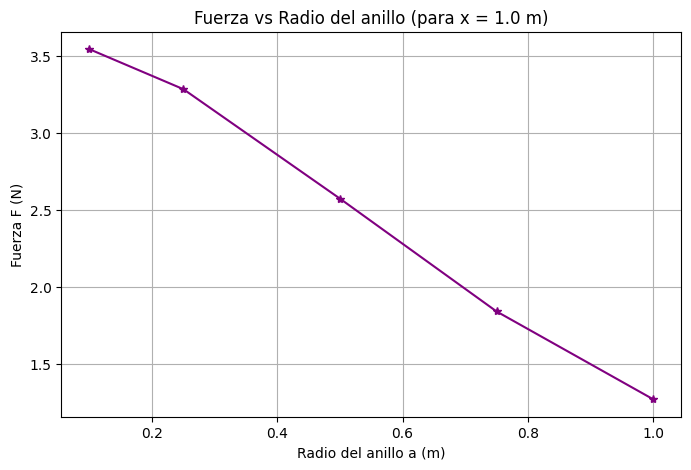

In [ ]:
#para el item c: graficamos la función y analizamos su comportamiento
x = 1.0  #en metros
#valores del radio para comparar
radios = [1.0, 0.75, 0.5, 0.25, 0.1]  #en metros

#calculamos la fuerza para cada radio
fuerzas = [fuerza_electrica(a, x) for a in radios]

#graficamos
plt.figure(figsize=(8, 5))
plt.plot(radios, fuerzas, '*-', color='purple')
plt.xlabel('Radio del anillo a (m)')
plt.ylabel('Fuerza F (N)')
plt.title(f'Fuerza vs Radio del anillo (para x = {x} m)')
plt.grid(True)
plt.show()
#en la gráfica podemos observar que cuando el radio disminuye, la fuerza aumenta

# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



In [ ]:
M0 = 1.6e5       # masa inicial del cohete (kg)
u = 1800         # velocidad de expulsión del combustible (m/s)
q = 2600         # razón de consumo del combustible (kg/s)
g = 9.81         # gravedad (m/s^2)

#definimos las funciones
def v(t):
    return u * np.log(M0 / (M0 - q * t)) - g * t

#función f(t) = v(t) - 750 = 0
def f(t):
    return v(t) - 750

def dvdt(t):
    return u * q / (M0 - q * t) - g

In [ ]:
#definimos el método de bisección (tomado de las notas de clase)
def biseccion(f, a, b, tol=1e-8, max_iter=100):
    """
    Implementación del método de bisección para encontrar la raíz de una función.

    Parámetros:
    f : function
        Función cuya raíz se desea encontrar.
    a : float
        Extremo izquierdo del intervalo inicial.
    b : float
        Extremo derecho del intervalo inicial.
    tol : float, opcional (por defecto = 1e-8)
        Tolerancia para la convergencia del método.
    max_iter : int, opcional (por defecto = 100)
        Número máximo de iteraciones permitidas.

    Retorna:
    tuple
        (raíz encontrada, lista de aproximaciones previas, número de iteraciones utilizadas)

    Lanza:
    ValueError : Si el intervalo no es válido (es decir, f(a) y f(b) tienen el mismo signo).
    RuntimeError : Si no se encuentra una raíz después de 'max_iter' iteraciones.
    """
    c_anterior = []  # Lista para almacenar los valores intermedios de 'c'
    # Verifica si el intervalo es válido (f(a) y f(b) deben tener signos opuestos)
    if f(a) * f(b) >= 0:
        raise ValueError("El intervalo no es válido")  # Lanza una excepción si no se cumple la condición
    else:
        for i in range(max_iter):  # Itera hasta el número máximo de iteraciones
            c = (a + b) / 2  # Calcula el punto medio inicial
            c_anterior.append(c)  # Guarda el valor actual de 'c' en la lista

            # Si el valor absoluto de f(c) es menor que la tolerancia, se considera que se encontró la raíz
            if abs(f(c)) < tol:
                return c, c_anterior #i + 1  # Retorna la raíz encontrada, la lista de valores previos y el número de iteraciones

            # Si f(c) y f(a) tienen signos opuestos, se ajusta el intervalo al lado izquierdo
            elif f(c) * f(a) < 0:
                b = c  # Se mueve el extremo derecho al punto medio

            else:
                a = c  # Se mueve el extremo izquierdo al punto medio
        raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')

In [ ]:
#calculamos las raíces con los tres métodos
t_nr, aprox_nr = newton_raphson(f, dvdt , x0=15)
t_bi, aprox_bi = biseccion(f, a= 20, b= 30)
t_rf, aprox_rf, iteraciones = regula_falsi(f, a= 20, b=30)

<ipython-input-17-22fd060c3880>:8: RuntimeWarning: invalid value encountered in log
  return u * np.log(M0 / (M0 - q * t)) - g * t


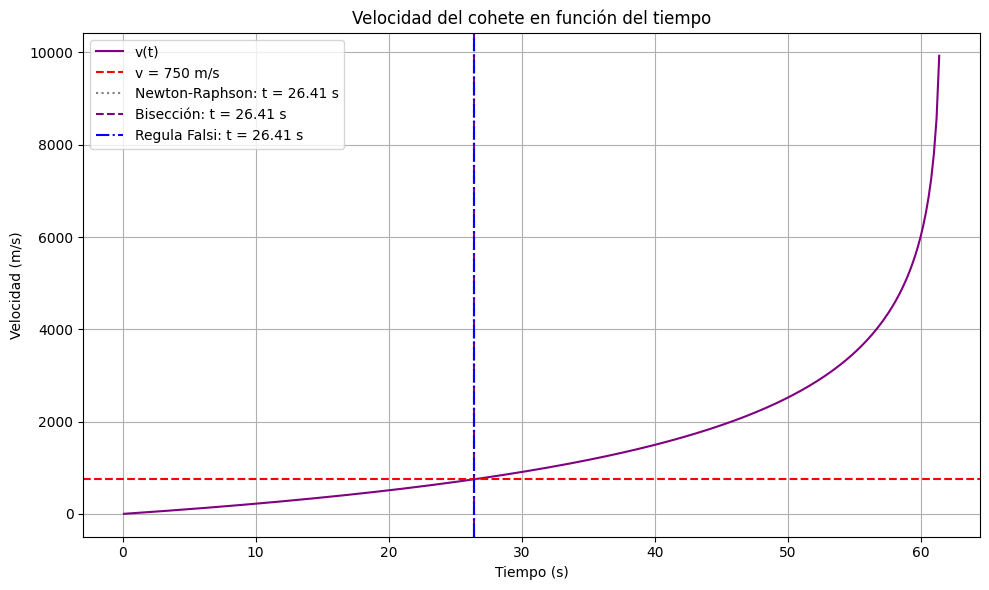

(None,
 (np.float64(26.407847955967046),
  26.407847955997568,
  np.float64(26.407847954268806)))

In [ ]:
#Gráfico de la velocidad
t_vals = np.linspace(0.1, 100, 500)
v_vals = v(t_vals)

plt.figure(figsize=(10,6))
plt.plot(t_vals, v_vals, label="v(t)", color='purple')
plt.axhline(750, color='red', linestyle='--', label='v = 750 m/s')
plt.axvline(t_nr, color='gray', linestyle=':', label=f'Newton-Raphson: t = {t_nr:.2f} s')
plt.axvline(t_bi, color='purple', linestyle='--', label=f'Bisección: t = {t_bi:.2f} s')
plt.axvline(t_rf, color='blue', linestyle='-.', label=f'Regula Falsi: t = {t_rf:.2f} s')
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Velocidad del cohete en función del tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show(), (t_nr, t_bi, t_rf)

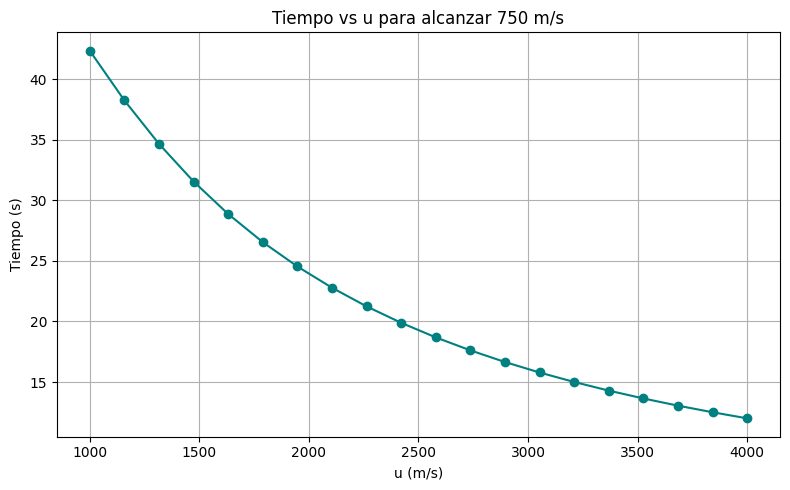

In [ ]:
#para el último item
us = np.linspace(1000, 4000, 20)  #20 valores de u entre 1000 y 4000 m/s
tiempos = []

#para encuentrar los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s
for ui in us:
    def v_ui(t):
        return ui * np.log(M0 / (M0 - q * t)) - g * t
    def f_ui(t):
        return v_ui(t) - 750
    try:
        t_sol, _, _ = regula_falsi(f_ui, a=5, b=60)
        tiempos.append(t_sol)
    except:
        tiempos.append(np.nan)

#gráficamos
plt.figure(figsize=(8,5))
plt.plot(us, tiempos, 'o-', color='teal')
plt.xlabel('u (m/s)')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo vs u para alcanzar 750 m/s')
plt.grid(True)
plt.tight_layout()
plt.show()

#Observe que al aumentar la velocidad de expulsión u, el tiempo que tarda el cohete en alcanzar los 750 m/s
#disminuye de forma no lineal, esto nos indica una relación inversa entre u y el tiempo.